In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer

In [2]:
E_data = pd.read_csv("Womens_Clothing_E_Commerce_Reviews.csv")
E_data.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [3]:
E_data = E_data.drop(['Unnamed: 0'],axis=1)

In [4]:
E_data.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
E_data.columns=['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name']

In [6]:
E_data.shape

(23486, 10)

In [7]:
E_data.isnull().any(0)

Clothing_ID                False
Age                        False
Title                       True
Review_Text                 True
Rating                     False
Recommended_IND            False
Positive_Feedback_Count    False
Division_Name               True
Department_Name             True
Class_Name                  True
dtype: bool

In [8]:
#finding the null values
for i in E_data.columns[E_data.isna().any()].tolist():
    print(i,'has',E_data[E_data[i].isna()==True].shape[0],'Null Values')

Title has 3810 Null Values
Review_Text has 845 Null Values
Division_Name has 14 Null Values
Department_Name has 14 Null Values
Class_Name has 14 Null Values


In [9]:
E_data['Rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [10]:
#Creating a column Class where rating>3 Good else Bad
E_data['Class'] = 'Bad'
E_data.loc[E_data.Rating>3,['Class']]='Good'

In [11]:
def ret_rating(rating):
    if rating>3:
        return 'Good'
    else:
        return 'Bad'

In [12]:
##E_data['Class'] = E_data.apply(lambda x:ret_rating(x['Rating']))

In [13]:
E_data.head(30)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Bad
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Good
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,Good
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Good
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,Good


In [14]:
E_data.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [15]:
E_data.isnull().sum()

Clothing_ID                   0
Age                           0
Title                      3810
Review_Text                 845
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                14
Department_Name              14
Class_Name                   14
Class                         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CE10491C8>,
      dtype=object)

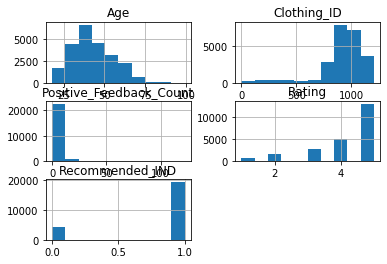

In [16]:
E_data.hist()

# Data Analysis

abc = E_data.groupby(['Rating'])['Rating'].agg({'counts':'count'})
abc = abc.sort_values(['counts'],ascending=False)
plt.rcParams["figure.figsize"]=(20,10)
y_pos = np.arange(len(abc.index))
counts = abc['counts'].tolist()
plt.bar(y_pos,counts,align='edge')
plt.xticks(y_pos,abc.index,rotation=90,fontsize=10)
plt.xlabel('Counts')
plt.ylabel('Rating')
plt.show()

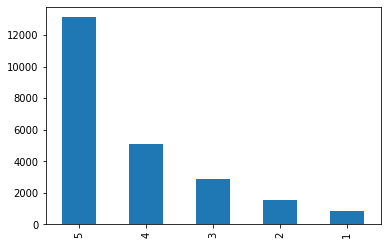

In [17]:
#Rating
E_data['Rating'].value_counts().plot(kind='bar')

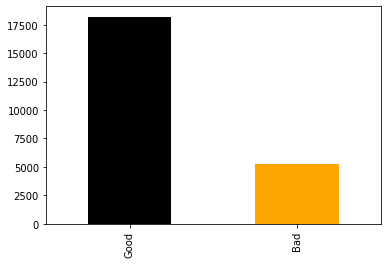

In [18]:
E_data['Class'].value_counts().plot(kind='bar',color=['black','orange'])

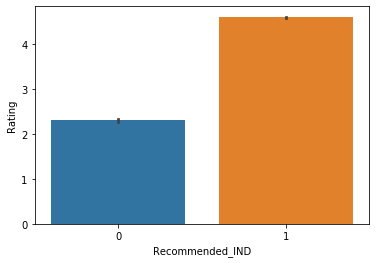

In [19]:
sns.barplot(x='Recommended_IND',y='Rating',data=E_data)

Text(0.5, 1.0, 'Counts Vs Department Name')

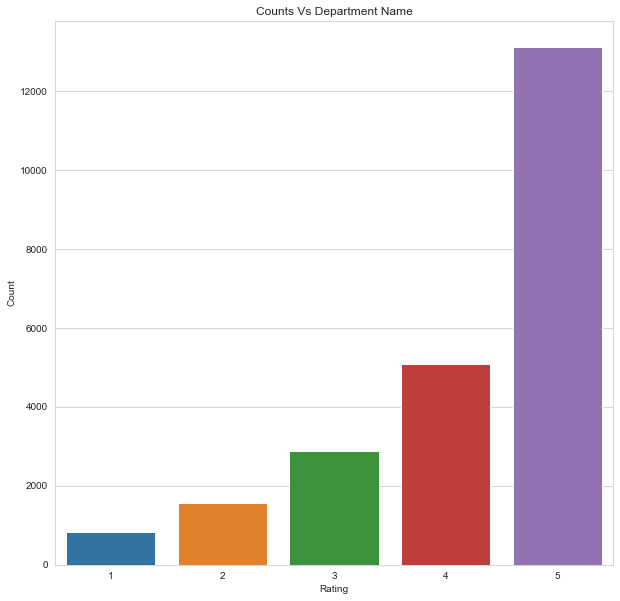

In [20]:
z=E_data.groupby(by=['Rating'],as_index=False).count().sort_values(by='Class_Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Rating'],y=z['Class_Name'], data=z)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")

In [21]:
#working on age
E_data[E_data.Age<100]['Age'].agg({'min','max'})

max    99
min    18
Name: Age, dtype: int64

In [22]:
E_data[E_data.Age>50]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,Bad
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,Good
21,1080,55,I'm torn!,"I'm upset because for the price of the dress, ...",4,1,14,General,Dresses,Dresses,Good
24,847,55,Versatile,"I love this shirt because when i first saw it,...",5,1,0,General,Tops,Blouses,Good
...,...,...,...,...,...,...,...,...,...,...,...
23458,862,63,NaN,This is my new favorite sweater. it is lightwe...,5,1,0,General Petite,Tops,Knits,Good
23459,1094,57,Perfect except slip,This is my new favorite dress! my only complai...,4,1,3,General Petite,Dresses,Dresses,Good
23463,262,65,Comfy pants,"These pants overall are very comfortable, but ...",4,1,1,General Petite,Intimate,Lounge,Good
23467,1104,60,Super flattering!,"I worry when i have an elastic waist, or somet...",5,1,23,General Petite,Dresses,Dresses,Good


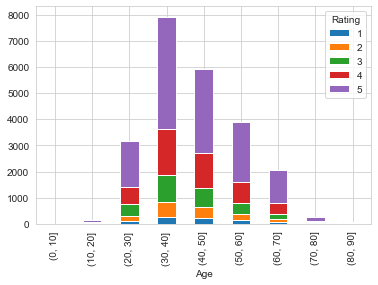

In [23]:
E_data.groupby(['Rating', pd.cut(E_data['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

In [24]:
E_data_new = E_data.copy()
E_data_new = E_data_new.dropna(subset = ['Review_Text'])

In [25]:
E_data_new.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good


# Trying NLP

In [26]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
 
stop = set(stopwords.words('english'))
sno = nltk.SnowballStemmer('english')

def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext

def cleanpunctuation(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r'',sentence)
    return cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
E_data_new.head()


,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


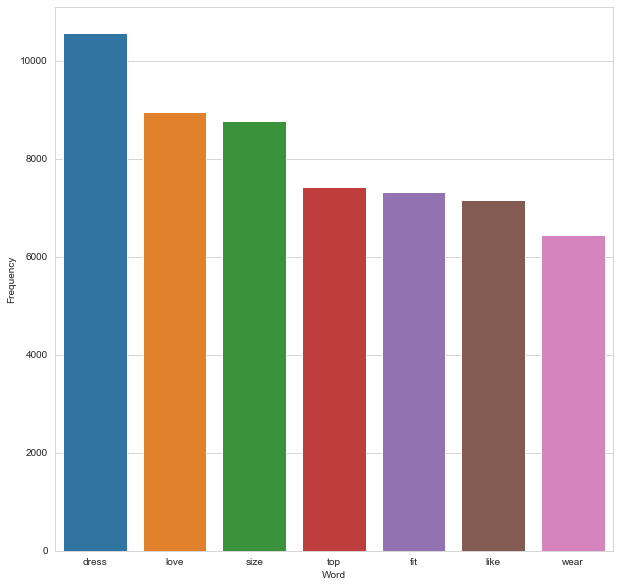

In [30]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

top_N = 100

#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = E_data_new['Review_Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))


The above barplot calculates the frequency of the word in Review Text column. The word Dress appeared more in the text. Next to this, the word Love comes second which is an indicator of positive review.

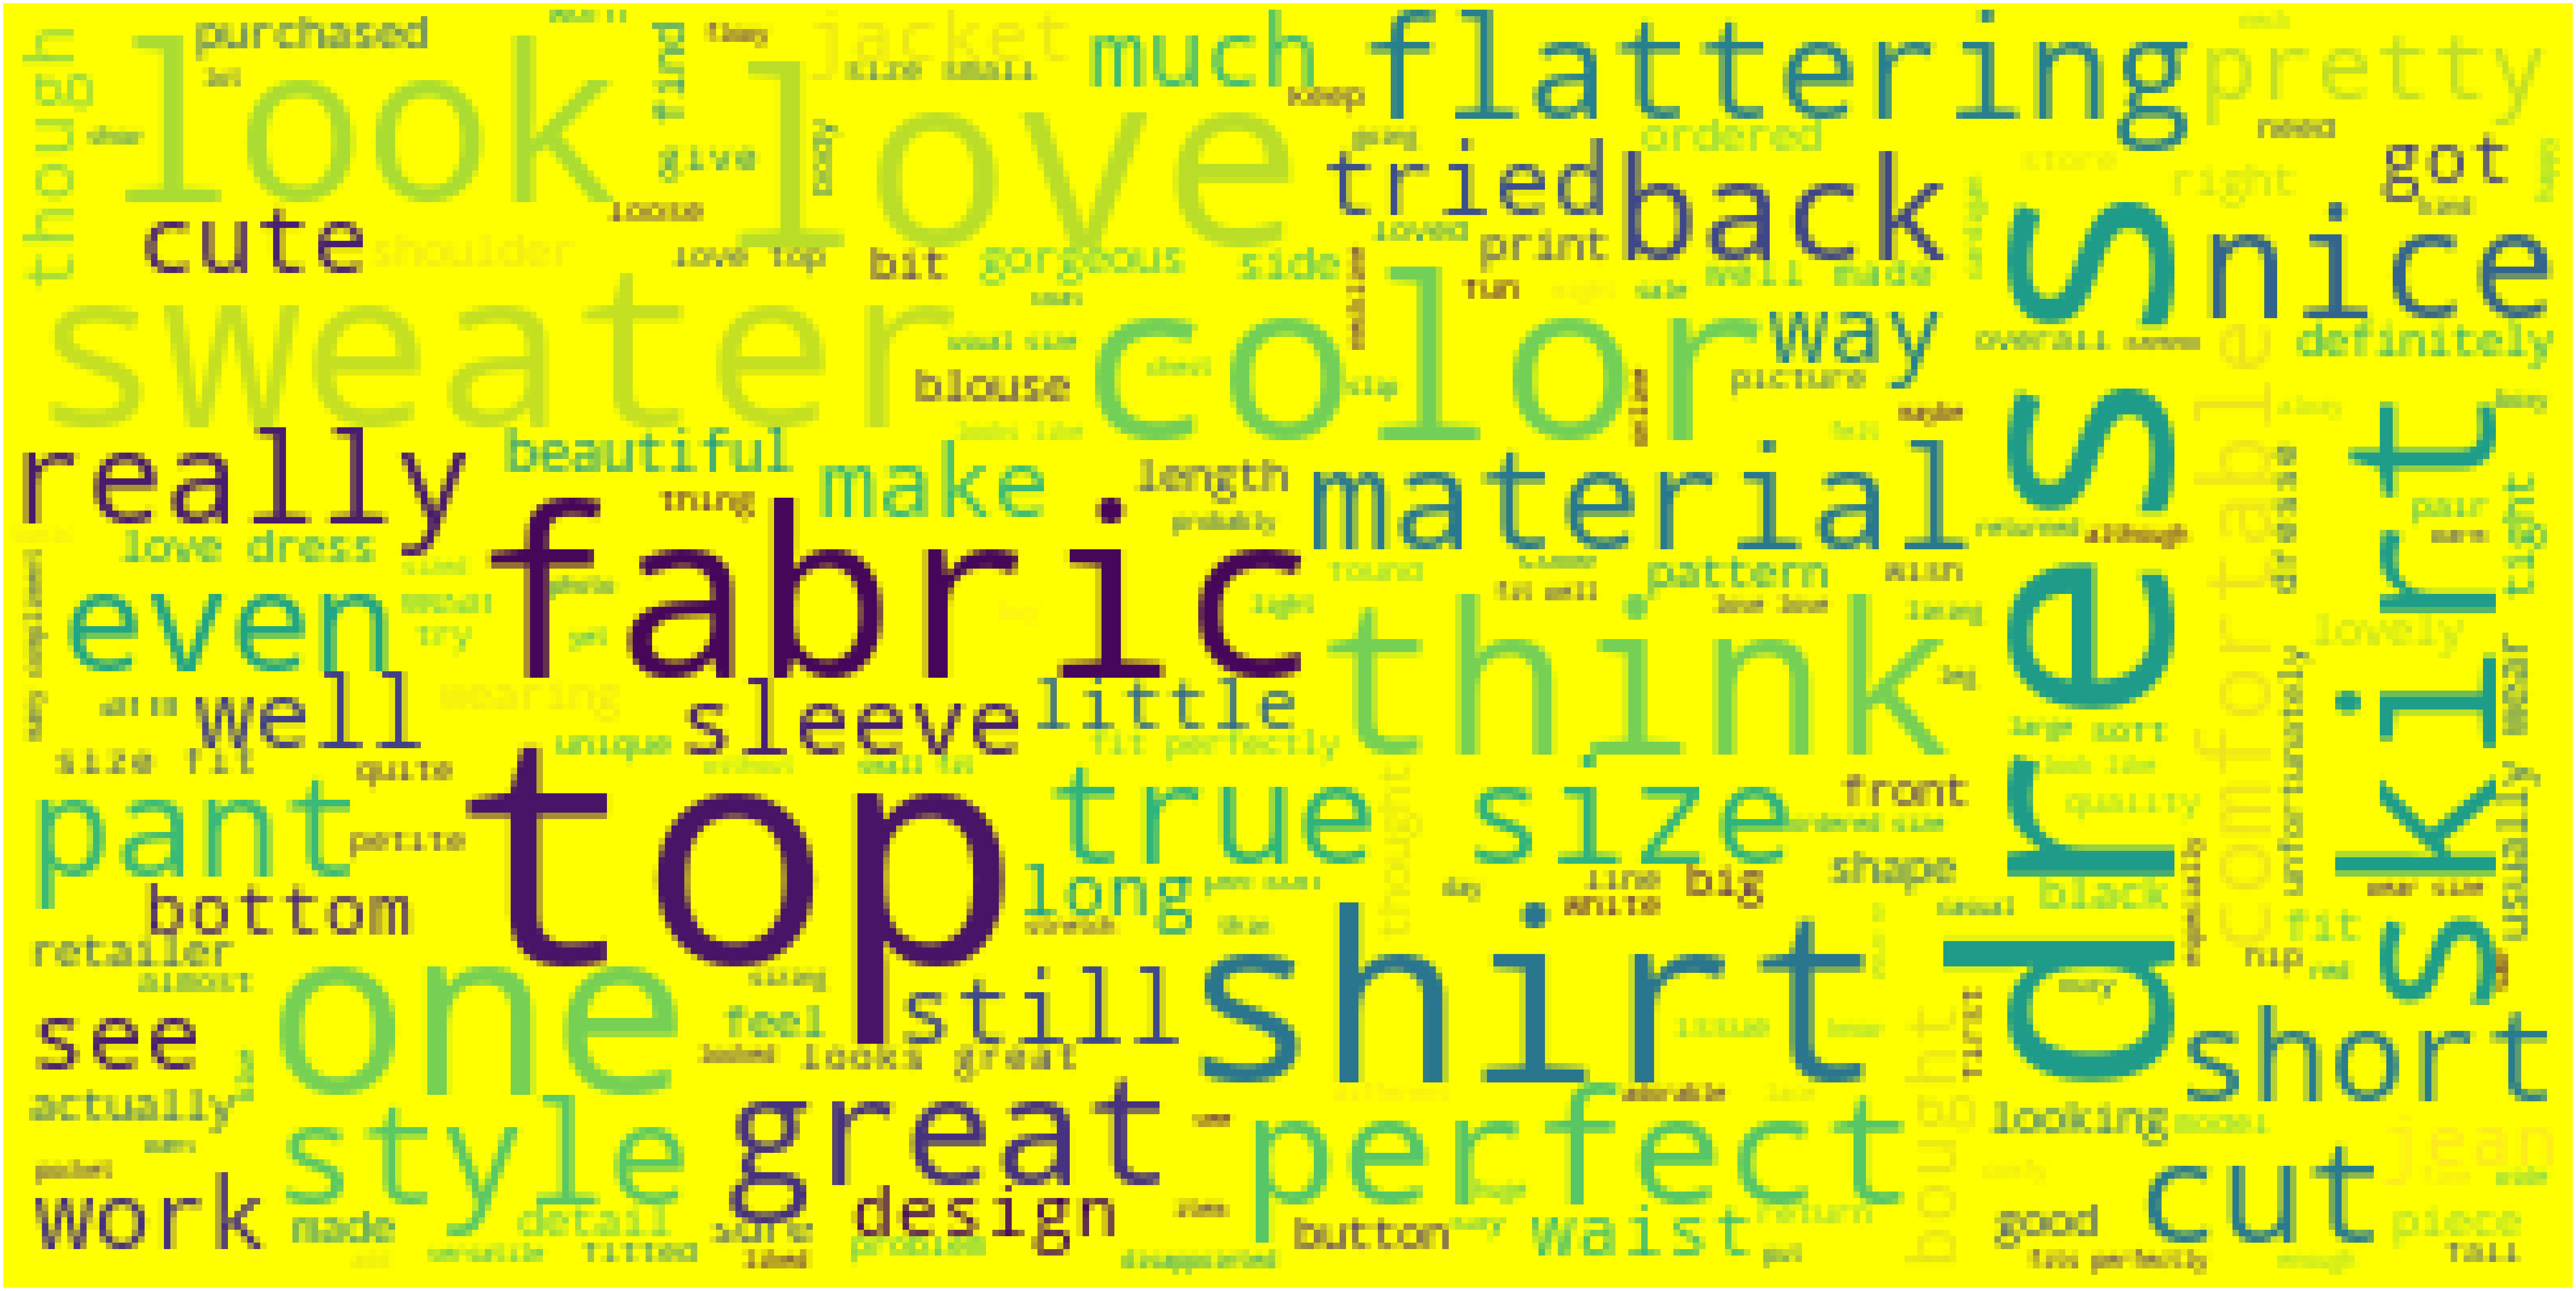

In [31]:
def E_data_new(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    E_data_new = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    E_data_new.generate(' '.join(data))
    plt.imshow(E_data_new)
    plt.axis('off')
E_data_new(cleaned_data_title,'yellow','Most Used Words')

The above wordcloud is for the most oftenly used words in the Review Text column

# Trying to implement Models

In [33]:
E_data_new_x=pd.DataFrame(E_data_new.iloc[:,-6])
E_data_new_x.head()

E_data_new_y=pd.DataFrame(E_data_new.iloc[:,-5])
E_data_new_y.head()

AttributeError: 'function' object has no attribute 'iloc'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(E_data_new_x, E_data_new_y, test_size=0.3)

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor 
regression=LinearRegression()
regression.fit(X_train, Y_train)

tree_regressor=DecisionTreeRegressor()
tree_regressor.fit(X_train, Y_train)

Y_pred_lin=regression.predict(X_test)


Y_pred_df=pd.DataFrame(Y_pred_lin, columns=["Predicted"])

Y_test.head()

In [ ]:
Y_pred_df.head()

In [ ]:
Y_pred_tree=tree_regressor.predict(X_test)


Y_tree_pred_df=pd.DataFrame(Y_pred_tree, columns=["Predicted"])
Y_tree_pred_df.head()

In [ ]:
plt.figure(figsize = (5,5))
plt.title('Actual vs Predicted ')
plt.xlabel('Recommended_IND')
plt.ylabel('cleaned_data_title')
plt.scatter(list(X_test["cleaned_data_title"]),list(Y_test["Recommended_IND"]),c='red')
plt.scatter(list(X_test["cleaned_data_title"]),list(Y_pred_df["Predicted"]),c='blue')
plt.show()

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score

ImportError: cannot import name 'accuracy_score' from 'sklearn.neighbors' (C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neighbors\__init__.py)

In [6]:
x_train1.x_test1 = train_test_split(final[['Review_Text','Recommended_IND']],test_size=0.2)

NameError: name 'final' is not defined

In [ ]:
y